In [1]:
import pandas as pd
import numpy as np
import random as rd # generating random numbers
import datetime
from pandas import read_csv
from datetime import datetime
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Create input path variable
Input_Path = 'F:/Capstone_Project/'

### Read Train dataset (taking 8 million  random data)
- n = 20104443 - 1 #number of records in file (excludes header)
- s = 8041777 #desired sample size (70%) 
- skip = sorted(rd.sample(range(n+1),n-s))
- df_train = pd.read_csv(filename, skiprows=skip,header = None, names = ['C/A','UNIT','SCP','STATION','LINENAME','DIVISION',                                                                     'DATE','TIME','DESC','ENTRIES','EXITS'],low_memory=False)

In [3]:
# To save time for testruns write the sample data to a csv file for future use
# df_train.to_csv(Input_Path+"traindata", index=False)
df=pd.read_csv(Input_Path+"traindata",low_memory=False)

In [4]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,11:00:00,REGULAR,0005967553,0002022233 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,15:00:00,REGULAR,0005967790,0002022331 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,23:00:00,REGULAR,0005968429,0002022470 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,03:00:00,REGULAR,0005968519,0002022492 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,07:00:00,REGULAR,0005968527,0002022504 ...


In [5]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
8041774,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2014,00:00:00,REGULAR,0000005554,0000000195 ...
8041775,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2014,04:00:00,REGULAR,0000005554,0000000195 ...
8041776,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2015,04:00:00,REGULAR,0000005554,0000000195 ...
8041777,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/01/2015,08:00:00,REGULAR,0000005554,0000000195 ...
8041778,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/02/2015,20:00:00,REGULAR,0000005554,0000000195 ...


In [6]:
df.describe()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
count,8041779,8041779,8041779,8041779,8041779,8041779,8041779,8041779,8041779,8041779,8041779
unique,735,468,219,569,129,7,729,85599,3,4939058,6633182
top,PTH05,R549,00-00-00,34 ST-PENN STA,1,IRT,02/19/2016,00:00:00,REGULAR,0000000000,0000000000 ...
freq,42951,103900,806488,176779,921230,2955772,13954,624559,8009199,148016,35857


## Data Cleaning 

In [7]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

##### Drop duplicate value

In [8]:
df.duplicated().value_counts()

False    8041737
True          42
dtype: int64

In [9]:
df = df.drop_duplicates()

In [11]:
df['C/A'].unique()
df = df.drop(df[df['C/A'] == 'C/A'].index)

In [12]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,11:00:00,REGULAR,0005967553,0002022233 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,15:00:00,REGULAR,0005967790,0002022331 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,23:00:00,REGULAR,0005968429,0002022470 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,03:00:00,REGULAR,0005968519,0002022492 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,07:00:00,REGULAR,0005968527,0002022504 ...


In [13]:
df.loc[df.UNIT == 'R105', 'STATION'] = "14 ST-6 AVE"
df.loc[df.STATION == '34 ST-PENN STA', 'LINENAME'] = "123ACE"
df.loc[df.STATION == '42 ST-PA BUS TE', 'STATION'] = "42 ST-TIMES SQ"
df.loc[df.STATION == '42 ST-TIMES SQ', 'LINENAME'] = "ACENQRS1237"
df.loc[df.UNIT == 'R346', 'STATION'] = "COURT SQ-23 ST"
df.loc[df.STATION == 'COURT SQ-23 ST', 'LINENAME'] = "EMG7"
df.loc[(df.STATION == 'FULTON ST') & (df.UNIT == 'R028'), 'LINENAME'] = "ACJZ2345"
df.loc[df.STATION == 'JAY ST-METROTEC', 'LINENAME'] = "ACFR"
df.loc[df.STATION == "MURRARY ST-B'WAY", 'STATION'] = "CITY HALL"
df.loc[df.STATION == '51 ST', 'LINENAME'] = "EM6"
df.loc[df.STATION == '51 ST', 'STATION'] = "LEXINGTON-53 ST"
df.loc[df.STATION == '5 AVE-BRYANT PK', 'STATION'] = "42 ST-BRYANT PK"
df.loc[df.STATION == '42 ST-BRYANT PK', 'LINENAME'] = "BDFM7"
df.loc[df.STATION == 'BOTANIC GARDEN', 'STATION'] = "FRANKLIN AVE"
df.loc[df.STATION == 'BOTANIC GARDEN', 'LINENAME'] = "2345S"
df.loc[df.STATION == 'BLEECKER ST', 'STATION'] = "BROADWAY/LAFAY"
df.loc[df.STATION == 'BLEECKER ST', 'LINENAME'] = "BDFQ6"
df.loc[df.STATION == '1 AV', 'STATION'] = "1 AVE"

In [14]:
df.loc[df.STATION == '42 ST-GRD CNTRL', 'STATION'] = "GRD CNTRL-42 ST"
df.loc[df['STATION'] == 'TIMES SQ-42 ST', 'STATION'] = '42 ST-TIMES SQ'
df.loc[df['STATION'] == '137 ST CITY COL', 'STATION'] = '137 ST-CITY COL'
df.loc[df['STATION'] == '182-183 STS', 'STATION'] = '182-183 ST'
df.loc[df['STATION'] == '33 ST-RAWSON ST', 'STATION'] = '33 ST/RAWSON ST'
df.loc[df['STATION'] == '40 ST LOWERY ST', 'STATION'] = '40 ST-LOWERY ST'
df.loc[df['STATION'] == '5 AVE/59 ST', 'STATION'] = '5 AVE-59 ST'
df.loc[df['STATION'] == '59 ST COLUMBUS', 'STATION'] = '59 ST-COLUMBUS'
df.loc[df['STATION'] == 'ASTOR PL', 'STATION'] = 'ASTOR PLACE'
df.loc[df['STATION'] == 'BEDFORD PK BLVD', 'STATION'] = 'BEDFORD PARK BL'
df.loc[df['STATION'] == 'BEVERLY RD', 'STATION'] = 'BEVERLY ROAD'
df.loc[df['STATION'] == 'CORTELYOU RD', 'STATION'] = 'CORTELYOU ROAD'
df.loc[df['STATION'] == 'FRESH POND RD', 'STATION'] = 'FRESH POND ROAD'
df.loc[df['STATION'] == 'HOWARD BCH JFK', 'STATION'] = 'HOWARD BCH-JFK'
df.loc[df['STATION'] == 'NECK RD', 'STATION'] = 'NECK ROAD'
df.loc[df['STATION'] == 'VERNON-JACKSON', 'STATION'] = 'VERNON/JACKSON'
df.loc[df['STATION'] == 'WAKEFIELD/241', 'STATION'] = 'WAKEFIELD-241'

In [15]:
df.STATION.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', '42 ST-TIMES SQ',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'FRANKLIN AVE',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU ROAD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK ROAD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
    

In [16]:
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES     object
EXITS       object
dtype: object

In [17]:
# Formatting date

df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format="%m/%d/%Y %H:%M:%S",errors='coerce')

In [18]:
df['TIME'] = df.DATETIME.dt.time

In [19]:
df.DATETIME.head()

0   2016-12-17 11:00:00
1   2016-12-17 15:00:00
2   2016-12-17 23:00:00
3   2016-12-18 03:00:00
4   2016-12-18 07:00:00
Name: DATETIME, dtype: datetime64[ns]

In [20]:
df.TIME.head()

0    11:00:00
1    15:00:00
2    23:00:00
3    03:00:00
4    07:00:00
Name: TIME, dtype: object

In [21]:
df.DATETIME.tail()

8041774   2014-12-31 00:00:00
8041775   2014-12-31 04:00:00
8041776   2015-01-01 04:00:00
8041777   2015-01-01 08:00:00
8041778   2015-01-02 20:00:00
Name: DATETIME, dtype: datetime64[ns]

In [22]:
# Drop na values 
df = df.dropna(how='any')

In [23]:
# Extracting Day, Month, Year , Weekdays
import datetime
df['Year'] = df['DATETIME'].dt.year.astype(int)
df['Month'] = df['DATETIME'].dt.month.astype(int)
df['Day'] = df['DATETIME'].dt.day.astype(int)
df['Weekdays'] = df['DATETIME'].dt.weekday_name

In [ ]:
df.Year.unique()

In [24]:
df = df.drop(df[df.Year == 2014].index)

In [25]:
df.Year.unique()

array([2016, 2015], dtype=int64)

In [26]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Year,Month,Day,Weekdays
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,11:00:00,REGULAR,0005967553,0002022233 ...,2016-12-17 11:00:00,2016,12,17,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,15:00:00,REGULAR,0005967790,0002022331 ...,2016-12-17 15:00:00,2016,12,17,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,23:00:00,REGULAR,0005968429,0002022470 ...,2016-12-17 23:00:00,2016,12,17,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,03:00:00,REGULAR,0005968519,0002022492 ...,2016-12-18 03:00:00,2016,12,18,Sunday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,07:00:00,REGULAR,0005968527,0002022504 ...,2016-12-18 07:00:00,2016,12,18,Sunday


In [27]:
##df.to_csv(Input_Path+"tableau_data.csv")

## Exploratory Data Analysis

### Which station has the most number of units

In [28]:
df_aggr = df[['UNIT','STATION']].groupby(['STATION'],sort = True).aggregate({'UNIT': pd.Series.nunique}).sort_values(by = 'UNIT', ascending = False ).reset_index()

In [29]:
df_aggr.head()

,STATION,UNIT
0,23 ST,6
1,CANAL ST,5
2,86 ST,5
3,125 ST,4
4,34 ST-PENN STA,4


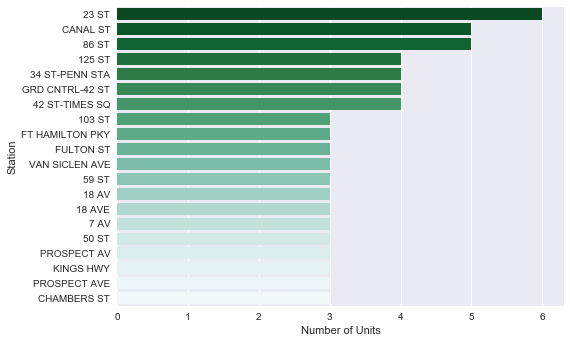

In [30]:
graph_1 = sns.barplot(x="UNIT",y="STATION", data=df_aggr.head(20), palette="BuGn_r")
graph_1.set(xlabel='Number of Units', ylabel='Station')

### What is the total number of entries & exits across the subway system for 2015 and 2016

In [31]:
# Monthly Entry count for 2015
df[df.Year == 2015].groupby(['Month'])['ENTRIES'].count()

Month
1     346994
2     308123
3     339135
4     328407
5     340089
6     329372
7     340271
8     339554
9     332381
10    342389
11    333006
12    343177
Name: ENTRIES, dtype: int64

In [32]:
# Monthly Entry count for 2016
df[df.Year == 2016].groupby(['Month'])['ENTRIES'].count()

Month
1     344053
2     327258
3     344390
4     332355
5     345002
6     333120
7     341703
8     340314
9     331678
10    339727
11    330284
12    254097
Name: ENTRIES, dtype: int64

In [33]:
# for both 2015 and 2016 for Entries
df.groupby(['Month'],sort = True)['ENTRIES'].count()

Month
1     691047
2     635381
3     683525
4     660762
5     685091
6     662492
7     681974
8     679868
9     664059
10    682116
11    663290
12    597274
Name: ENTRIES, dtype: int64

In [34]:
# Entries by monthly
df_monthly = df[['ENTRIES','Month']].groupby(['Month'],sort = True).count().sort_values(by =['ENTRIES'], ascending = False).reset_index()

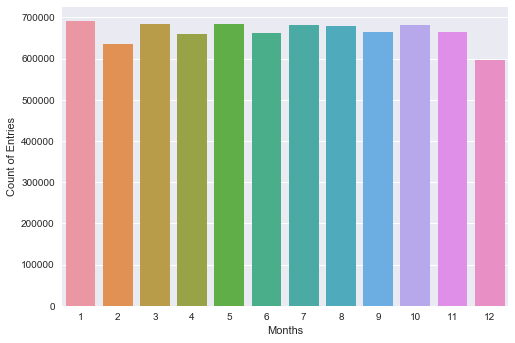

In [35]:
ax = sns.barplot(x='Month', y='ENTRIES', data=df_monthly)
ax.set(xlabel='Months', ylabel='Count of Entries')

In [36]:
# monthly exit counts for year 2015 and 2016
df.groupby(['Month'])['EXITS'].count()

Month
1     691047
2     635381
3     683525
4     660762
5     685091
6     662492
7     681974
8     679868
9     664059
10    682116
11    663290
12    597274
Name: EXITS, dtype: int64

In [37]:
# Exits by monthly
df_monthly_exits = df[['EXITS','Month']].groupby(['Month'],sort = True).count().sort_values(by =['EXITS'], ascending = False).reset_index()

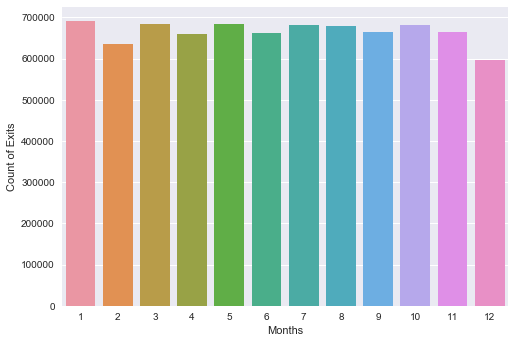

In [38]:
ay = sns.barplot(x='Month', y='EXITS', data=df_monthly_exits)
ay.set(xlabel='Months', ylabel='Count of Exits')

In [39]:
# total count of exits and entries for both the years
total = df.groupby(['Month'])['EXITS'].count().sum() + df.groupby(['Month'])['ENTRIES'].count().sum()
print(total)

15973758


In [40]:
# total number of entries for both the years
total_no_of_Entries = df.groupby(['Year'],sort = True)['ENTRIES'].count()
print(total_no_of_Entries)

Year
2015    4022898
2016    3963981
Name: ENTRIES, dtype: int64


In [41]:
# Yearly Entries
df_Yearly_entries = df[['ENTRIES','Year']].groupby(['Year'],sort = True).count().sort_values(by =['ENTRIES'], ascending = False).reset_index()

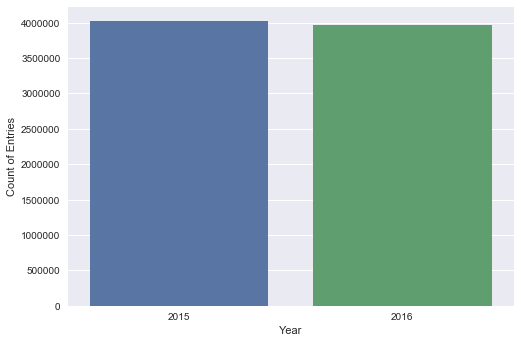

In [42]:
az = sns.barplot(x='Year', y='ENTRIES', data=df_Yearly_entries)
az.set(xlabel='Year', ylabel='Count of Entries')

In [43]:
# yearly count of all attributes 
df.groupby(['Year']).count()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Month,Day,Weekdays
Year,,,,,,,,,,,,,,,
2015,4022898,4022898,4022898,4022898,4022898,4022898,4022898,4022898,4022898,4022898,4022898,4022898,4022898,4022898,4022898
2016,3963981,3963981,3963981,3963981,3963981,3963981,3963981,3963981,3963981,3963981,3963981,3963981,3963981,3963981,3963981


In [44]:
# Monthly count of exits for both the years 2015 & 2016
total_no_of_Exits = df.groupby(['Month'],sort = True)['EXITS'].count()
print(total_no_of_Exits)

Month
1     691047
2     635381
3     683525
4     660762
5     685091
6     662492
7     681974
8     679868
9     664059
10    682116
11    663290
12    597274
Name: EXITS, dtype: int64


In [45]:
df1 = df.copy()

In [46]:
df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Year,Month,Day,Weekdays
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,11:00:00,REGULAR,0005967553,0002022233 ...,2016-12-17 11:00:00,2016,12,17,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,15:00:00,REGULAR,0005967790,0002022331 ...,2016-12-17 15:00:00,2016,12,17,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,23:00:00,REGULAR,0005968429,0002022470 ...,2016-12-17 23:00:00,2016,12,17,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,03:00:00,REGULAR,0005968519,0002022492 ...,2016-12-18 03:00:00,2016,12,18,Sunday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,07:00:00,REGULAR,0005968527,0002022504 ...,2016-12-18 07:00:00,2016,12,18,Sunday


In [47]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Year,Month,Day,Weekdays
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,11:00:00,REGULAR,0005967553,0002022233 ...,2016-12-17 11:00:00,2016,12,17,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,15:00:00,REGULAR,0005967790,0002022331 ...,2016-12-17 15:00:00,2016,12,17,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,23:00:00,REGULAR,0005968429,0002022470 ...,2016-12-17 23:00:00,2016,12,17,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,03:00:00,REGULAR,0005968519,0002022492 ...,2016-12-18 03:00:00,2016,12,18,Sunday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,07:00:00,REGULAR,0005968527,0002022504 ...,2016-12-18 07:00:00,2016,12,18,Sunday


### Busyness is defined as the sum of entries and exits.  
### a)Which station was the busiest
### b)Busiest Turnstile : {C/A, Unit, SCP}



#merge the columns that define a turnstile
df['TURNSTILE'] = df['C/A'] + '  ' + df['UNIT'] + '  ' + df['SCP']

In [48]:
df['TOTAL_COUNT']= df['ENTRIES'] + df['EXITS']

In [49]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Year,Month,Day,Weekdays,TOTAL_COUNT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,11:00:00,REGULAR,0005967553,0002022233 ...,2016-12-17 11:00:00,2016,12,17,Saturday,00059675530002022233 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,15:00:00,REGULAR,0005967790,0002022331 ...,2016-12-17 15:00:00,2016,12,17,Saturday,00059677900002022331 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,23:00:00,REGULAR,0005968429,0002022470 ...,2016-12-17 23:00:00,2016,12,17,Saturday,00059684290002022470 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,03:00:00,REGULAR,0005968519,0002022492 ...,2016-12-18 03:00:00,2016,12,18,Sunday,00059685190002022492 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,07:00:00,REGULAR,0005968527,0002022504 ...,2016-12-18 07:00:00,2016,12,18,Sunday,00059685270002022504 ...


### Busiest Station

In [50]:
df_BUSY = df[['TOTAL_COUNT','STATION']].groupby(['STATION'],sort = True).aggregate({'TOTAL_COUNT': pd.Series.nunique}).sort_values(by = 'TOTAL_COUNT', ascending = False ).reset_index()

In [51]:
df_BUSY.head()

,STATION,TOTAL_COUNT
0,34 ST-PENN STA,164775
1,FULTON ST,138700
2,42 ST-TIMES SQ,126714
3,GRD CNTRL-42 ST,96021
4,CANAL ST,94967


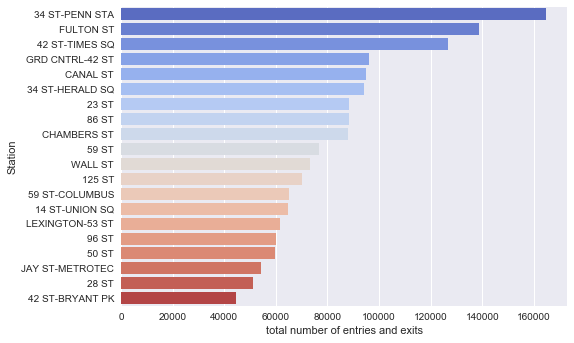

In [52]:
graph_2 = sns.barplot(x='TOTAL_COUNT',y='STATION', data=df_BUSY.head(20), palette="coolwarm")
graph_2.set(xlabel='total number of entries and exits', ylabel='Station')

#### The busiest Station is 34 ST-PENN Station

### Weekly Traffic

In [209]:
# Traffic flow by Weekday
df_traffic = df[['TOTAL_COUNT','STATION','Weekdays']].groupby(['STATION','Weekdays'],sort = True).count().sort_values(by = 'TOTAL_COUNT', ascending = False ).reset_index()

In [210]:
df_traffic.set_index('Weekdays')


,STATION,TOTAL_COUNT
Weekdays,,
Thursday,34 ST-PENN STA,25543
Monday,34 ST-PENN STA,25405
Friday,34 ST-PENN STA,25389
Tuesday,34 ST-PENN STA,25186
Wednesday,34 ST-PENN STA,25074
Sunday,34 ST-PENN STA,24503
Saturday,34 ST-PENN STA,24488
Monday,FULTON ST,24407
Thursday,FULTON ST,24080


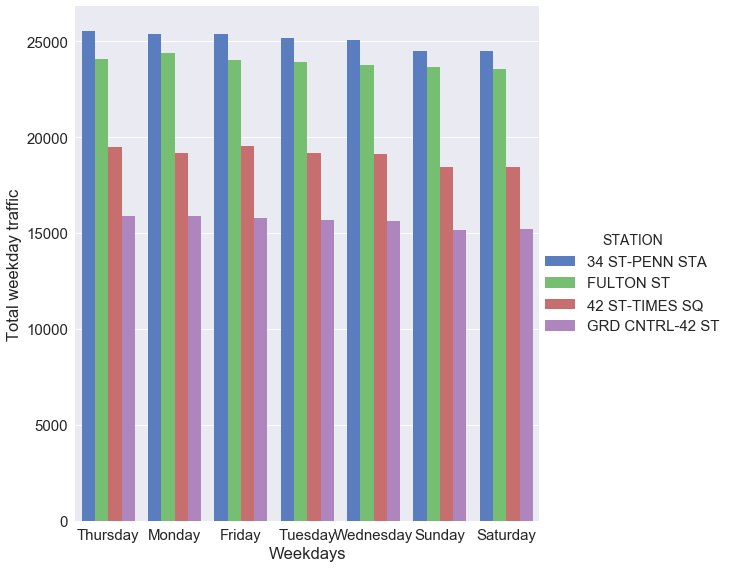

In [211]:
# Traffic flow by Weekday

g = sns.factorplot(x='Weekdays', y="TOTAL_COUNT", hue="STATION", data=df_traffic.head(28),size=8, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total weekday traffic")

In [53]:
graph_5 = sns.barplot(x='Weekdays',y='TOTAL_COUNT', data=df_traffic, palette="coolwarm")
graph_5.set(xlabel='Weekdays', ylabel='Total Weekday Traffic')

NameError: name 'df_traffic' is not defined

## Busiest Hour 

In [213]:
df.TIME.unique()

array([datetime.time(11, 0), datetime.time(15, 0), datetime.time(23, 0),
       ..., datetime.time(17, 55, 58), datetime.time(17, 44, 46),
       datetime.time(17, 50, 14)], dtype=object)

In [214]:
df['Hour'] = df['DATETIME'].dt.hour.astype(int)

In [215]:
df['Hour'].head()

0    11
1    15
2    23
3     3
4     7
Name: Hour, dtype: int32

In [216]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Year,Month,Day,Weekdays,TOTAL_COUNT,Hour
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,11:00:00,REGULAR,0005967553,0002022233 ...,2016-12-17 11:00:00,2016,12,17,Saturday,00059675530002022233 ...,11
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,15:00:00,REGULAR,0005967790,0002022331 ...,2016-12-17 15:00:00,2016,12,17,Saturday,00059677900002022331 ...,15
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,23:00:00,REGULAR,0005968429,0002022470 ...,2016-12-17 23:00:00,2016,12,17,Saturday,00059684290002022470 ...,23
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,03:00:00,REGULAR,0005968519,0002022492 ...,2016-12-18 03:00:00,2016,12,18,Sunday,00059685190002022492 ...,3
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,07:00:00,REGULAR,0005968527,0002022504 ...,2016-12-18 07:00:00,2016,12,18,Sunday,00059685270002022504 ...,7


In [217]:
df.Hour.unique()

array([11, 15, 23,  3,  7, 19,  5,  9, 13, 17, 21,  1,  8,  0, 16, 20,  4,
       12,  6, 10, 18, 22, 14,  2], dtype=int64)

In [219]:
# Hoursly Traffic flow
df_Hourly_Traffic = df[['TOTAL_COUNT','Hour']].groupby(['Hour'],sort = True).count().sort_values(by =['TOTAL_COUNT'], ascending = False).reset_index()

In [220]:
df_Hourly_Traffic.head()

,Hour,TOTAL_COUNT
0,8,676898
1,12,649983
2,0,649224
3,16,648481
4,20,648458


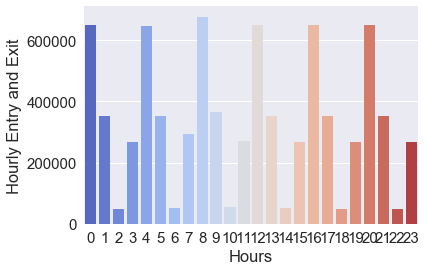

In [221]:
graph_4 = sns.barplot(x='Hour',y='TOTAL_COUNT', data=df_Hourly_Traffic, palette="coolwarm")
graph_4.set(xlabel='Hours', ylabel='Hourly Entry and Exit')

#### What turnstile was the busiest on that date?

In [222]:
#merge the columns that define a turnstile
df['TURNSTILE'] = df['C/A'] + ' ' + df['UNIT'] + ' ' + df['SCP']

In [223]:
df_Turnstile = df.groupby('TURNSTILE')['TOTAL_COUNT'].aggregate({'TOTAL_COUNT': pd.Series.nunique}).sort_values(by = 'TOTAL_COUNT', ascending = False ).reset_index().copy()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [224]:
df_Turnstile.head()

,TURNSTILE,TOTAL_COUNT
0,N501 R020 01-00-00,1907
1,N519 R461 00-03-02,1892
2,R238 R046 00-00-08,1891
3,N507 R023 00-00-03,1881
4,N213 R154 00-00-02,1870


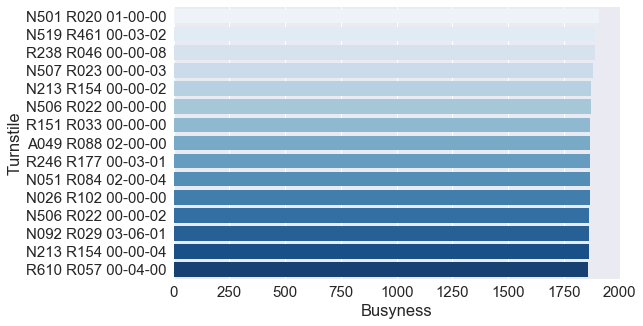

In [225]:
f, ax = plt.subplots(figsize=(8, 5))

g =sns.barplot(x='TOTAL_COUNT',y='TURNSTILE', data=df_Turnstile.head(15), palette="Blues")
g.set(xlabel='Busyness', ylabel='Turnstile')

### What dates in 2016 and 2015 are the least busy?

In [226]:
df_Least_Busy = df.groupby('DATE')['TOTAL_COUNT'].aggregate({'TOTAL_COUNT': pd.Series.nunique}).sort_values(by = 'TOTAL_COUNT', ascending = True ).reset_index().copy()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [227]:
df_Least_Busy[['DATE','TOTAL_COUNT']].head()

,DATE,TOTAL_COUNT
0,03/13/2016,9185
1,03/08/2015,9208
2,05/30/2015,9816
3,01/24/2016,9822
4,01/27/2015,9836


In [228]:
# most busy date
df_most_busy_date = df[['TOTAL_COUNT','DATE']].groupby(['DATE'],sort = True).count().sort_values(by =['TOTAL_COUNT'], ascending = False).reset_index()

In [229]:
df_most_busy_date.head()

,DATE,TOTAL_COUNT
0,02/19/2016,13954
1,01/12/2015,13186
2,12/14/2016,12653
3,02/25/2016,12365
4,01/16/2015,12135


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

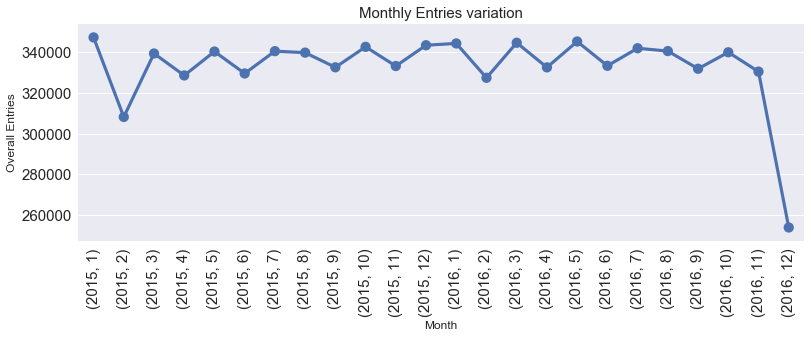

In [230]:
# month over month entries
temp=df.groupby(['Year','Month'])['ENTRIES'].count()
plt.figure(figsize=(13,4))
sns.pointplot(temp.index,temp.values, alpha=0.8)
plt.ylabel('Overall Entries', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Monthly Entries variation', fontsize=15)
plt.xticks(rotation='vertical')

## Heat Map

In [231]:
df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Year,Month,Day,Weekdays
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,11:00:00,REGULAR,0005967553,0002022233 ...,2016-12-17 11:00:00,2016,12,17,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,15:00:00,REGULAR,0005967790,0002022331 ...,2016-12-17 15:00:00,2016,12,17,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/17/2016,23:00:00,REGULAR,0005968429,0002022470 ...,2016-12-17 23:00:00,2016,12,17,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,03:00:00,REGULAR,0005968519,0002022492 ...,2016-12-18 03:00:00,2016,12,18,Sunday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2016,07:00:00,REGULAR,0005968527,0002022504 ...,2016-12-18 07:00:00,2016,12,18,Sunday


In [232]:
df1.dtypes

C/A                 object
UNIT                object
SCP                 object
STATION             object
LINENAME            object
DIVISION            object
DATE                object
TIME                object
DESC                object
ENTRIES             object
EXITS               object
DATETIME    datetime64[ns]
Year                 int32
Month                int32
Day                  int32
Weekdays            object
dtype: object

In [233]:
# changing the data type
df1['ENTRIES'] = df1['ENTRIES'].astype(int)
df1['EXITS'] = df1['EXITS'].astype(int)

In [234]:
df1.dtypes

C/A                 object
UNIT                object
SCP                 object
STATION             object
LINENAME            object
DIVISION            object
DATE                object
TIME                object
DESC                object
ENTRIES              int32
EXITS                int32
DATETIME    datetime64[ns]
Year                 int32
Month                int32
Day                  int32
Weekdays            object
dtype: object

In [236]:
df1['Hour'] = df1['DATETIME'].dt.hour.astype(int)

In [237]:
df1 = df1[['UNIT','SCP','STATION','LINENAME','Month','Hour','ENTRIES','TIME','EXITS','Day','Year']]

In [238]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

df1['STATION'] = number.fit_transform(df1['STATION'])
df1['LINENAME'] = number.fit_transform(df1['LINENAME'])
df1['UNIT'] = number.fit_transform(df1['UNIT'])
df1['SCP'] = number.fit_transform(df1['SCP'])


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

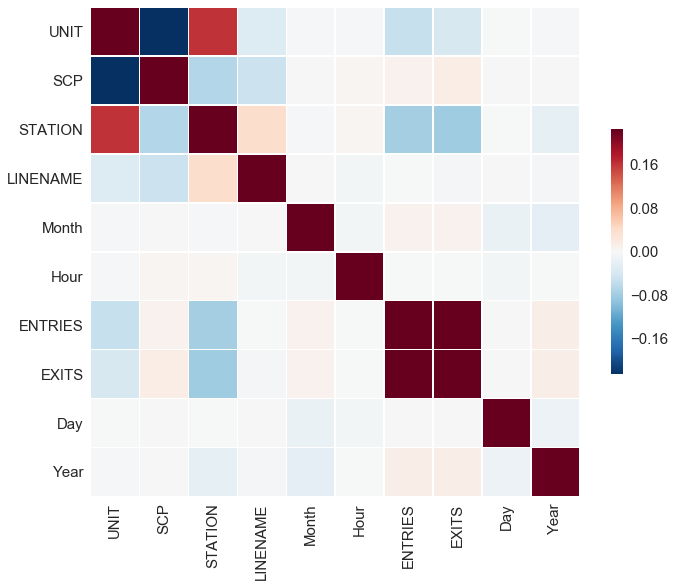

In [239]:
cor_matrix = df1.corr()
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor_matrix, vmax=.20, square=True,center=0,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()

## Data Modeling

### We took a smaller sample as compared to the one we considered for EDA because of the runtime error of low memory

In [88]:
df_model=pd.read_csv(Input_Path+"traindata.csv",low_memory=False)

In [89]:
df_model.head()

,C/A,UNIT,SCP,STATION,Latitude,Longitude,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Day,Year,Month,Weekdays,Hour
0,H007,R248,00-03-01,1 AVE,40.840556,-73.940133,L,BMT,12/22/2016,19:00:00,REGULAR,1789480,741880,22-12-2016 19:00,22,2016,12,Thursday,19
1,H007,R248,00-03-01,1 AVE,40.840556,-73.940133,L,BMT,12/23/2016,11:00:00,REGULAR,1789846,742071,23-12-2016 11:00,23,2016,12,Friday,11
2,H008,R248,01-00-04,1 AVE,40.840556,-73.940133,L,BMT,12/23/2016,11:00:00,REGULAR,5734405,607702,23-12-2016 11:00,23,2016,12,Friday,11
3,H007,R248,00-00-00,1 AVE,40.840556,-73.940133,L,BMT,12/16/2016,19:00:00,REGULAR,11849310,13000537,16-12-2016 19:00,16,2016,12,Friday,19
4,H007,R248,00-03-01,1 AVE,40.840556,-73.940133,L,BMT,12-11-2016,07:00:00,REGULAR,1777536,737617,11-12-2016 07:00,11,2016,12,Sunday,7


In [90]:
# sample size for Data Modeling
len(df_model)

199639

In [91]:
df_2016 = df_model[df_model.Year == 2016]

In [92]:
df_2016.Year.unique()

array([2016], dtype=int64)

In [93]:
# Data for 2016 as per the feature selection
df_2016 = df_model.loc[:,['UNIT','SCP','C/A','LINENAME','Month','STATION','Hour','ENTRIES']]

In [94]:
df_2016.head()

,UNIT,SCP,C/A,LINENAME,Month,STATION,Hour,ENTRIES
0,R248,00-03-01,H007,L,12,1 AVE,19,1789480
1,R248,00-03-01,H007,L,12,1 AVE,11,1789846
2,R248,01-00-04,H008,L,12,1 AVE,11,5734405
3,R248,00-00-00,H007,L,12,1 AVE,19,11849310
4,R248,00-03-01,H007,L,12,1 AVE,7,1777536


In [101]:
# ENSEMBLE APPROACHES
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing as pre
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [95]:
df_2016.dtypes

UNIT        object
SCP         object
C/A         object
LINENAME    object
Month        int64
STATION     object
Hour         int64
ENTRIES      int64
dtype: object

In [97]:
# changing the data type for the model as the regressor accepts only integer values and the output variable is integer as well
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

df_2016['STATION'] = number.fit_transform(df_2016['STATION'])
df_2016['LINENAME'] = number.fit_transform(df_2016['LINENAME'])
df_2016['UNIT'] = number.fit_transform(df_2016['UNIT'])
df_2016['C/A'] = number.fit_transform(df_2016['C/A'])
df_2016['SCP'] = number.fit_transform(df_2016['SCP'])

In [98]:
df_2016.head()

,UNIT,SCP,C/A,LINENAME,Month,STATION,Hour,ENTRIES
0,238,27,123,104,12,0,19,1789480
1,238,27,123,104,12,0,11,1789846
2,238,70,124,104,12,0,11,5734405
3,238,0,123,104,12,0,19,11849310
4,238,27,123,104,12,0,7,1777536


In [99]:
#train data without ENTRIES
train_data = df_2016.reset_index(drop=True)  #we reset the index
y_labels = train_data['ENTRIES']
X_train_data = train_data.drop(['ENTRIES'], axis = 1)

print('Shape X :', X_train_data.shape)
print('Shape y :', y_labels.shape)

Shape X : (199639, 7)
Shape y : (199639,)


In [102]:
# splitting train and test
num_test = 0.20
X_train, X_validation, y_train, y_validation = train_test_split(X_train_data, y_labels, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_validation shape :', X_validation.shape)
print('y_validation shape :', y_validation.shape)

X_train shape : (159711, 7)
y_train shape : (159711,)
X_validation shape : (39928, 7)
y_validation shape : (39928,)


In [103]:
# Choose the type of classifier. 
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
#YOU CAN TRY DIFFERENTS PARAMETERS TO FIND THE BEST MODEL
parameters = {'n_estimators': [5, 10, 100],
              #'criterion': ['mse'],
              #'max_depth': [5, 10, 15], 
              #'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1,5]
             }

# Type of scoring used to compare parameter combinations
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

# Run the grid search
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, #Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [104]:
predictions = RFR.predict(X_validation)

#if we want to Re-scale, use this lines of code :
#predictions = predictions * (max_train - min_train) + min_train
#y_validation_RF = y_validation * (max_train - min_train) + min_train

#if not, keep this one:
y_validation_RF = y_validation

print('R2 score = ',r2_score(y_validation_RF, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation_RF, predictions), '/ 0.0')

R2 score =  0.922914310668 / 1.0
MSE score =  2.65457445852e+15 / 0.0


### The R square value for Random Forest Regessor is 92.3%

## XG Boost

In [105]:
## scaling ENTRIES
min_train, max_train = df_2016['ENTRIES'].min(), df_2016['ENTRIES'].max()

scalable_variables = ['ENTRIES']

for var in scalable_variables:
    mini, maxi = df_2016[var].min(), df_2016[var].max()
    df_2016.loc[:,var] = (df_2016[var] - mini) / (maxi - mini)

print('Shape : ', df_2016.shape)

Shape :  (199639, 8)


In [107]:
#train data without ENTRIES
from sklearn.model_selection import train_test_split
train_data = df_2016.reset_index(drop=True)  #we reset the index
xg_train, xg_valid = train_test_split(train_data,test_size = 0.012,random_state=10) # data splitting
y1=xg_train[['ENTRIES']]
y2=xg_valid[['ENTRIES']]

In [108]:
xg_valid = xg_valid.drop(['ENTRIES'], axis = 1)
xg_train = xg_train.drop(['ENTRIES'], axis = 1)
yg_train = np.log1p(y1)
yg_valid = np.log1p(y2)

In [109]:
# selecting features as list
features = list(xg_train)
features2 = list(yg_train)

In [110]:
# creating xgboost specific DMatrix for numpy , DMatrix is a internal data structure that used by XGBoost 
# which is optimized for both memory efficiency and training speed
dtrain = xgb.DMatrix(xg_train[features], yg_train)
dvalid = xgb.DMatrix(xg_valid[features], yg_valid)

In [111]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat-y) ** 2))

In [112]:
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [113]:
params = {"objective": "reg:linear",#linear regression
          "booster" : "gbtree",#booster parameter
          "eta": 0.3,#to shrink weights to make boosting more conservative (used to prevent overfitting)
          "max_depth": 10,# maximum depth of a tree[default=6]
          "subsample": 0.9,#subsample ratio of the training instance XGBoost randomly collected half of the data instances to grow trees and this will prevent overfitting.
          "colsample_bytree": 0.7,#subsample ratio of columns when constructing each tree
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 5
watchlist = [(dtrain, 'train_data'), (dvalid, 'eval')]

In [114]:
gbm = xgb.train(params, dtrain, evals=watchlist, early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)

[0]	train_data-rmspe:0.41781	eval-rmspe:0.417924
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train_data-rmspe:0.280788	eval-rmspe:0.281646
[2]	train_data-rmspe:0.194168	eval-rmspe:0.195753
[3]	train_data-rmspe:0.13838	eval-rmspe:0.140572
[4]	train_data-rmspe:0.102446	eval-rmspe:0.10432
[5]	train_data-rmspe:0.079223	eval-rmspe:0.082556
[6]	train_data-rmspe:0.067015	eval-rmspe:0.071255
[7]	train_data-rmspe:0.060193	eval-rmspe:0.065238
[8]	train_data-rmspe:0.052528	eval-rmspe:0.058924
[9]	train_data-rmspe:0.050444	eval-rmspe:0.057037


In [115]:
print("Make predictions on the test set")
dtest = xgb.DMatrix(xg_valid[features])
yhat = gbm.predict(dtest)
error = rmspe(yg_valid.ENTRIES.values, np.expm1(yhat))
print('RMSPE: {:.6f}'.format(error))

Make predictions on the test set
RMSPE: 0.040061


In [116]:
yhat

array([ 0.02532834,  0.01875728,  0.01778781, ...,  0.01792324,
        0.0340611 ,  0.01897073], dtype=float32)

In [117]:
xg_valid.head()

,UNIT,SCP,C/A,LINENAME,Month,STATION,Hour
30700,50,49,609,19,7,77,16
52936,69,28,1,114,1,110,13
83419,362,1,112,75,7,197,9
98697,448,50,25,100,9,250,9
193085,128,91,230,43,11,540,20


In [118]:
result = pd.DataFrame({"STATION": xg_valid["STATION"], 'ENTRIES': np.expm1(yhat)})
#result.to_csv("submission.csv", index=False)
#print("Submission created")
result.head()

,ENTRIES,STATION
30700,0.025652,77
52936,0.018934,110
83419,0.017947,197
98697,0.028287,250
193085,0.022843,540


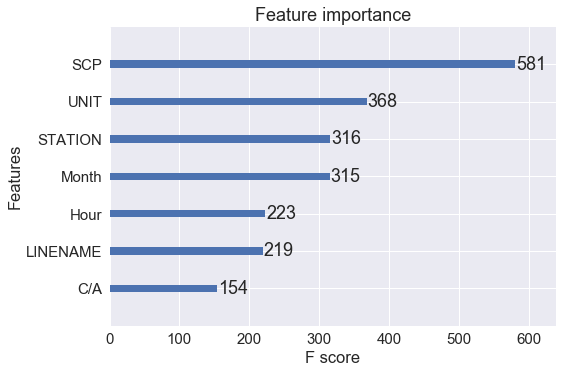

In [119]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

xgb.plot_importance(gbm)

In [120]:
importances = gbm.get_fscore()
importances

{'C/A': 154,
 'Hour': 223,
 'LINENAME': 219,
 'Month': 315,
 'SCP': 581,
 'STATION': 316,
 'UNIT': 368}

### Accuracy for the xgboost model is found to be 95.99%